In [34]:
import pandas as pd

In [35]:
import pandas as pd

# Read the text file into a pandas DataFrame
with open('TG_STAID004563.txt', 'r') as f:
    lines = f.readlines()

# Extract the lines containing the data, starting from line 21
data_lines = lines[20:]

# Create a StringIO object from the data_lines to read the data with pandas
from io import StringIO
data_string = StringIO(''.join(data_lines))

# Read the data into a pandas DataFrame with the correct column names
df = pd.read_csv(data_string, sep=',', names=['SOUID', 'DATE', 'TG', 'Q_TG'], header=None)

# Display the DataFrame
df.head()



,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


In [36]:
# Create a new column with the TG values divided by 10
df['TG_Celsius'] = df['TG'] / 10

# Display the DataFrame
df.head()


,SOUID,DATE,TG,Q_TG,TG_Celsius
0,127488,18760101,22,0,2.2
1,127488,18760102,25,0,2.5
2,127488,18760103,3,0,0.3
3,127488,18760104,-58,0,-5.8
4,127488,18760105,-98,0,-9.8


In [33]:
# df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
# df.head(10)

,SOUID,DATE,TG,Q_TG,TG_Celsius
0,127488,1876-01-01,22,0,2.2
1,127488,1876-01-02,25,0,2.5
2,127488,1876-01-03,3,0,0.3
3,127488,1876-01-04,-58,0,-5.8
4,127488,1876-01-05,-98,0,-9.8
5,127488,1876-01-06,-77,0,-7.7
6,127488,1876-01-07,-66,0,-6.6
7,127488,1876-01-08,-89,0,-8.9
8,127488,1876-01-09,-127,0,-12.7
9,127488,1876-01-10,-89,0,-8.9


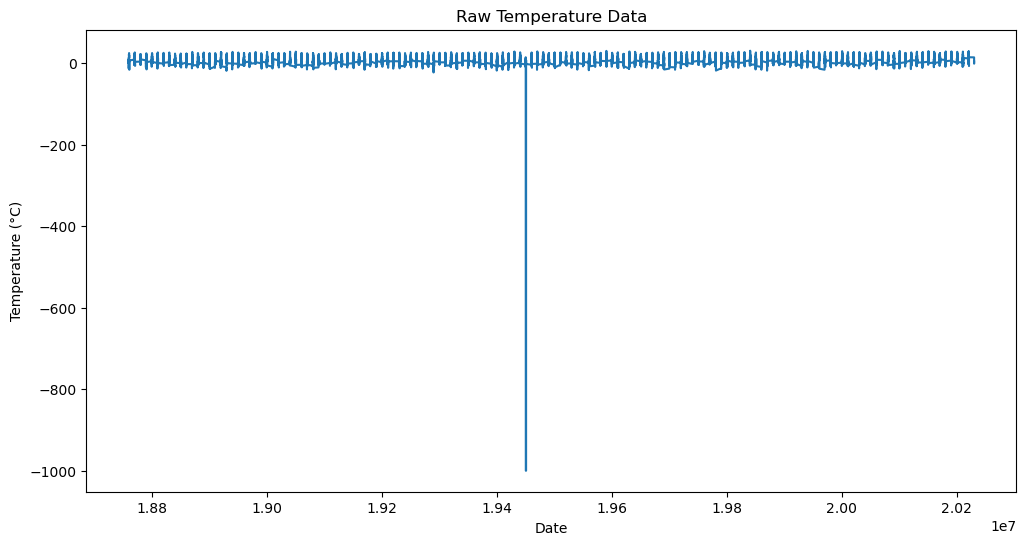

In [37]:
import matplotlib.pyplot as plt

# Convert the DATE column to a datetime object
# df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

# Create a line plot of the raw temperature data
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['TG_Celsius'])
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Raw Temperature Data')
plt.show()


In [38]:
# Convert the DATE column to a string data type
df['DATE'] = df['DATE'].astype(str)


In [39]:
# Slice off year, month, and day into separate columns
df['year'] = df['DATE'].str[0:4]
df['month'] = df['DATE'].str[4:6]
df['day'] = df['DATE'].str[6:8]


In [40]:
df.head(10)

,SOUID,DATE,TG,Q_TG,TG_Celsius,year,month,day
0,127488,18760101,22,0,2.2,1876,01,01
1,127488,18760102,25,0,2.5,1876,01,02
2,127488,18760103,3,0,0.3,1876,01,03
3,127488,18760104,-58,0,-5.8,1876,01,04
4,127488,18760105,-98,0,-9.8,1876,01,05
5,127488,18760106,-77,0,-7.7,1876,01,06
6,127488,18760107,-66,0,-6.6,1876,01,07
7,127488,18760108,-89,0,-8.9,1876,01,08
8,127488,18760109,-127,0,-12.7,1876,01,09
9,127488,18760110,-89,0,-8.9,1876,01,10


In [41]:

# Create a new date column via string concatenation
df['formatted_date'] = df['year'] + '-' + df['month'] + '-' + df['day']



In [42]:
df.head(10)

,SOUID,DATE,TG,Q_TG,TG_Celsius,year,month,day,formatted_date
0,127488,18760101,22,0,2.2,1876,01,01,1876-01-01
1,127488,18760102,25,0,2.5,1876,01,02,1876-01-02
2,127488,18760103,3,0,0.3,1876,01,03,1876-01-03
3,127488,18760104,-58,0,-5.8,1876,01,04,1876-01-04
4,127488,18760105,-98,0,-9.8,1876,01,05,1876-01-05
5,127488,18760106,-77,0,-7.7,1876,01,06,1876-01-06
6,127488,18760107,-66,0,-6.6,1876,01,07,1876-01-07
7,127488,18760108,-89,0,-8.9,1876,01,08,1876-01-08
8,127488,18760109,-127,0,-12.7,1876,01,09,1876-01-09
9,127488,18760110,-89,0,-8.9,1876,01,10,1876-01-10


In [46]:
date_series = df['formatted_date']
df.index = pd.to_datetime(date_series)
df.head(10)

,SOUID,DATE,TG,Q_TG,TG_Celsius,year,month,day,formatted_date
formatted_date,,,,,,,,,
1876-01-01,127488,18760101,22,0,2.2,1876,01,01,1876-01-01
1876-01-02,127488,18760102,25,0,2.5,1876,01,02,1876-01-02
1876-01-03,127488,18760103,3,0,0.3,1876,01,03,1876-01-03
1876-01-04,127488,18760104,-58,0,-5.8,1876,01,04,1876-01-04
1876-01-05,127488,18760105,-98,0,-9.8,1876,01,05,1876-01-05
1876-01-06,127488,18760106,-77,0,-7.7,1876,01,06,1876-01-06
1876-01-07,127488,18760107,-66,0,-6.6,1876,01,07,1876-01-07
1876-01-08,127488,18760108,-89,0,-8.9,1876,01,08,1876-01-08
1876-01-09,127488,18760109,-127,0,-12.7,1876,01,09,1876-01-09


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['formatted_date'], df['TG_Celsius'])
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Raw Temperature Data')
plt.show()

In [61]:
# Calculate the overall median temperature, ignoring the missing values (-999.9)
median_temp = df.loc[df['TG'] != -999.9, 'TG'].median()

# Create a new column, replacing -999.9 with the overall median temperature
df['TG_median_filled'] = df['TG'].replace(-999.9, median_temp)


In [64]:
df.head(10)

,SOUID,DATE,TG,Q_TG,TG_Celsius,year,month,day,formatted_date,TG_median_filled
formatted_date,,,,,,,,,,
1876-01-01,127488,18760101,22,0,2.2,1876,01,01,1876-01-01,22
1876-01-02,127488,18760102,25,0,2.5,1876,01,02,1876-01-02,25
1876-01-03,127488,18760103,3,0,0.3,1876,01,03,1876-01-03,3
1876-01-04,127488,18760104,-58,0,-5.8,1876,01,04,1876-01-04,-58
1876-01-05,127488,18760105,-98,0,-9.8,1876,01,05,1876-01-05,-98
1876-01-06,127488,18760106,-77,0,-7.7,1876,01,06,1876-01-06,-77
1876-01-07,127488,18760107,-66,0,-6.6,1876,01,07,1876-01-07,-66
1876-01-08,127488,18760108,-89,0,-8.9,1876,01,08,1876-01-08,-89
1876-01-09,127488,18760109,-127,0,-12.7,1876,01,09,1876-01-09,-127


In [52]:
df.loc[:'2022-12-31']
df.tail(10)

,SOUID,DATE,TG,Q_TG,TG_Celsius,year,month,day,formatted_date,TG_median_filled
formatted_date,,,,,,,,,,
1876-01-01,127488,18760101,22,0,2.2,1876,01,01,1876-01-01,22
1876-01-02,127488,18760102,25,0,2.5,1876,01,02,1876-01-02,25
1876-01-03,127488,18760103,3,0,0.3,1876,01,03,1876-01-03,3
1876-01-04,127488,18760104,-58,0,-5.8,1876,01,04,1876-01-04,-58
1876-01-05,127488,18760105,-98,0,-9.8,1876,01,05,1876-01-05,-98
1876-01-06,127488,18760106,-77,0,-7.7,1876,01,06,1876-01-06,-77
1876-01-07,127488,18760107,-66,0,-6.6,1876,01,07,1876-01-07,-66
1876-01-08,127488,18760108,-89,0,-8.9,1876,01,08,1876-01-08,-89
1876-01-09,127488,18760109,-127,0,-12.7,1876,01,09,1876-01-09,-127


In [53]:
df.tail(10)

,SOUID,DATE,TG,Q_TG,TG_Celsius,year,month,day,formatted_date,TG_median_filled
formatted_date,,,,,,,,,,
2023-01-22,111448,20230122,16,0,1.6,2023,01,22,2023-01-22,16
2023-01-23,111448,20230123,16,0,1.6,2023,01,23,2023-01-23,16
2023-01-24,111448,20230124,8,0,0.8,2023,01,24,2023-01-24,8
2023-01-25,111448,20230125,8,0,0.8,2023,01,25,2023-01-25,8
2023-01-26,111448,20230126,-7,0,-0.7,2023,01,26,2023-01-26,-7
2023-01-27,111448,20230127,16,0,1.6,2023,01,27,2023-01-27,16
2023-01-28,111448,20230128,1,0,0.1,2023,01,28,2023-01-28,1
2023-01-29,111448,20230129,11,0,1.1,2023,01,29,2023-01-29,11
2023-01-30,111448,20230130,38,0,3.8,2023,01,30,2023-01-30,38


In [54]:
yearly = df.resample('Y').median()

In [56]:
yearly.head(10)

,SOUID,TG,Q_TG,TG_Celsius,TG_median_filled
formatted_date,,,,,
1876-12-31,127488.0,94.0,0.0,9.40,94.0
1877-12-31,127488.0,85.0,0.0,8.50,85.0
1878-12-31,127488.0,109.0,0.0,10.90,109.0
1879-12-31,127488.0,79.0,0.0,7.90,79.0
1880-12-31,127488.0,90.5,0.0,9.05,90.5
1881-12-31,127488.0,78.0,0.0,7.80,78.0
1882-12-31,127488.0,97.0,0.0,9.70,97.0
1883-12-31,127488.0,76.0,0.0,7.60,76.0
1884-12-31,127488.0,83.5,0.0,8.35,83.5


In [57]:
df2 = pd.DataFrame(yearly)
df2.head(10)

,SOUID,TG,Q_TG,TG_Celsius,TG_median_filled
formatted_date,,,,,
1876-12-31,127488.0,94.0,0.0,9.40,94.0
1877-12-31,127488.0,85.0,0.0,8.50,85.0
1878-12-31,127488.0,109.0,0.0,10.90,109.0
1879-12-31,127488.0,79.0,0.0,7.90,79.0
1880-12-31,127488.0,90.5,0.0,9.05,90.5
1881-12-31,127488.0,78.0,0.0,7.80,78.0
1882-12-31,127488.0,97.0,0.0,9.70,97.0
1883-12-31,127488.0,76.0,0.0,7.60,76.0
1884-12-31,127488.0,83.5,0.0,8.35,83.5


In [59]:
df3 = df2.drop(['SOUID', 'TG', 'Q_TG', 'TG_Celsius', ], axis=1)
df3.head(10)

,TG_median_filled
formatted_date,
1876-12-31,94.0
1877-12-31,85.0
1878-12-31,109.0
1879-12-31,79.0
1880-12-31,90.5
1881-12-31,78.0
1882-12-31,97.0
1883-12-31,76.0
1884-12-31,83.5


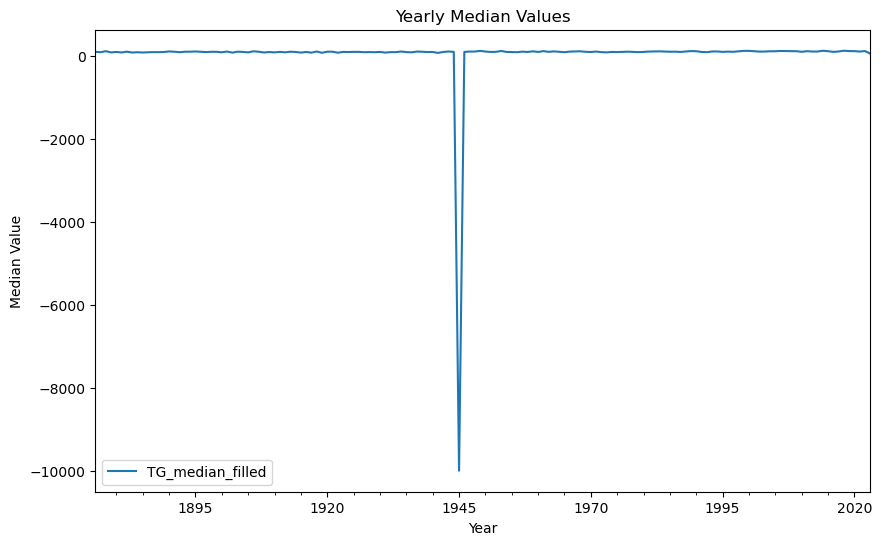

In [60]:
import matplotlib.pyplot as plt

# Plot the DataFrame as a line plot
df3.plot(kind='line', figsize=(10, 6), title='Yearly Median Values')

# Add labels to the x and y axes
plt.xlabel('Year')
plt.ylabel('Median Value')

# Show the plot
plt.show()
